Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 03: Morphological Operations¶

## Introduction

This week's sheet should be solved and handed in before the end of **Monday, December 2, 2024**. If you need help (and Google and other resources were not enough) use the StudIP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (complex numbers) [0 Points]

This exercise is supposed to be easy, does not give any points, and is voluntary. There may be similar exercises on future sheets. They are intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look up these concepts (again). You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *complex number*, what is the *complex plane*, how are complex numbers usually denoted?

A complex number consists of a real part and an imaginary part. It is used to represent $\sqrt{-1}$, which cannot be calculated using real numbers alone. It can be visualized in the complex plane, with the real part on the x-axis and the imaginary part on the y-axis. Every multiplication of a complex number $z = a + b \cdot i$ by $i$ rotates $z$ counterclockwise by an angle of $90^\circ$ in the complex plane.


**b)** What is the *real* and the *imaginary* part of a complex number? What is the *absolute value* of a complex number? What is the *complex conjugate*?

The real part $a$ can be represented by the real numbers and the imaginary part consists of $b*i$. The absolute value $\left| z \right|$, which is also the norm of the vector $z$ can be calculated using Pythagoras:
$$
|z| = \sqrt{a^2 + b^2}
$$The complex conjugate, denoted as $\overline{z} = a - b i$ is linked to the absolute value of a complex number, because the square root of the product of a complex numer $z$ and its conjugate gives us:
$$
|z| = \sqrt{z\cdot\overline{z}}
$$

So the norm of a complex number $|z|$, which represents the distance from the origin in the complex plane, can be described using the Pythagorean theorem and also in terms of the product of the complex number and its conjugate.




**c)** What are polar coordinates? What are their advantages? Can you convert between cartesian and polar coordinates? Can you write down $i=\sqrt{-1}$ in polar coordinates? What about $\sqrt{i}$?

Polar coordinates describe a complex vector with $r$ which is the same as $|z| = \sqrt{z\cdot\overline{z}}$ and $\theta$, which is the angle between the vector and the real part axis (x-axis). A complex number $z$ can be denoted in polar form as:

$$
z=r\cdot(\cos({\theta})+i\cdot\sin({\theta}))
$$

$r\cdot\cos({\theta})$ describes the real part and $i\cdot r\sin({\theta})$ describes the imaginary part.

This derives from euler formula:

$$
e^{i\theta} = \cos({\theta}) + i\sin({\theta})
$$

extended with $r$ we get our shortened formula to transform cartesian to polar coordinates:

$$
r\cdot e^{i\theta} = \cos({\theta}) + i\sin({\theta})
$$


So a complex vector can not only be described in cartesian coordinates with $z = a + b \cdot i$ but also as the product of $r$ (its norm, e.g. distance from origin in cartesian system) and the cosine of the real part and the sine of the imaginary part. $r$ describes its distance from origin and $r\cdot\cos({\theta})$ is the vectors' projection on real part axis (x-axis), while $i\cdot r\sin({\theta})$ can be seen as the vectors' projection on imaginary axis (y-axis). 

$r = 1$, because we are working on unity circle if $b=1$
$$
i = 1 \cdot \left( \cos\left(\frac{\pi}{2}\right) + i \cdot \sin\left(\frac{\pi}{2}\right) \right) 
$$

which is in Euler notation:

$$
i = e^{i\cdot\frac{\pi}{2}}
$$

$$
\sqrt{i} = 1 \cdot \left( \cos\left(\frac{\pi}{4}\right) + i \cdot \sin\left(\frac{\pi}{4}\right) \right)
$$

which is in Euler notation:

$$
i = e^{i\cdot\frac{\pi}{4}}
$$

Polar coordinates are much more intuitive, when working with image data which are often less linear. Moreover there are structures like circles or shifted lines. Describing hese non-linear objects in terms of cartesian coordinates causes much more computational time as every objects' point in cartesian plane has to be calcualted using the formula $y=m\cdot x + b$. The polar coordinates allow us to know every point of the object only described by $r$ and $\theta$. Furthermore - in contrast to the polar system - non-linear objects can never be described exactly in cartesian plane: It will always be an approximation (the more precise the more computational extensive).

**d)** Python, and also numpy, support calculations with complex numbers. Consult the documentation to find out details. Notice that $i$ is substituted by $j$ in Python.

In [17]:
np.exp(1j*np.pi/4)

(0.7071067811865476+0.7071067811865476j)

## Assignment 1: Noise and Local Operators (7 points)

In [1]:
import numpy as np
import skimage.data
import imageio.v3 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

## Getting the Original Image

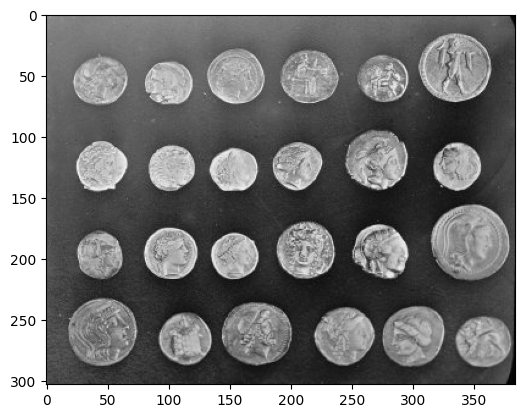

In [2]:
image = skimage.data.coins().astype(np.float64)
plt.imshow(image, cmap="gray")
plt.show()

### a) Salt and Pepper Noise

Add salt and pepper noise to the image.

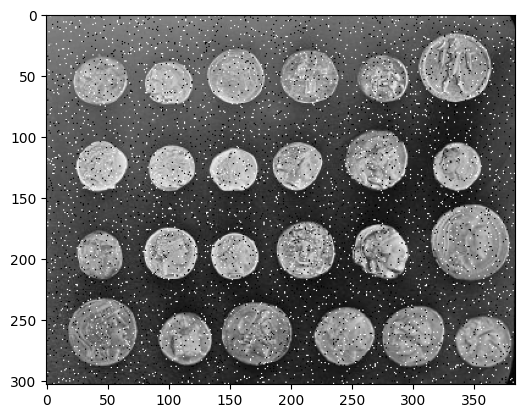

In [3]:
noise_ratio = .05
sp_noisy = image.copy()

M,N = sp_noisy.shape
size = int(M*N*noise_ratio)
# Create random indices
indices = (np.random.randint(0,M,size=size), np.random.randint(0,N,size=size))
sp_noisy[indices] = np.random.choice([0, 255],size=size)
plt.imshow(sp_noisy, cmap="gray")
plt.show()

### b) Gaussian Noise
Add gaussian noise to the image.

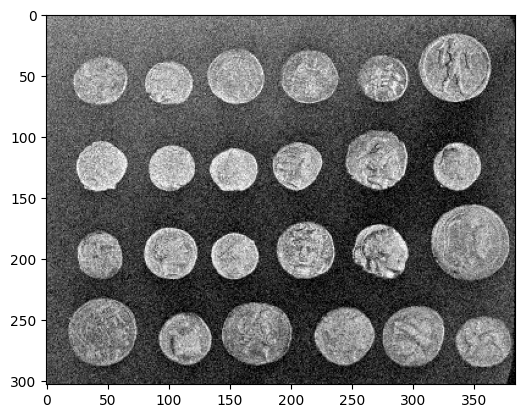

In [21]:
sigma = 20
gauss_noisy = image.copy()
gaussian_noise = np.random.normal(0, sigma, image.shape)
gauss_noisy = gauss_noisy + gaussian_noise
gauss_noisy = np.clip(gauss_noisy,0,255)
plt.imshow(gauss_noisy, cmap="gray")
plt.show()

## c) Define Local Operator
In this exercise you will have to finish the local_operator function (cf. CV-04 p. 14).

The function will receive an image (img), kernel size (kernel_size) and a function as parameters.

For each pixel in the image, it will select a window of surrounding pixels according to the kernel_size.

This window is then passed on to the function as an argument.
The function then stores the result in the same position of the resulting image.
Therefore, the function should look similar to this:
```python
# define the function
def f(data):
    """Function to be applied by the local operator. 
    This example just returns 0.0, i.e. a black image.
    
    Args:
        data (np.ndarray): The window of the image as array. 
            Has the same shape as kernel_size, passed to local_operator.
        
    Returns:
        result (float): The value for the pixel at the same position in the resulting image
    """
    return 0.0

# call the local_operator with the function
local_operator(
    image,
    kernel_size=(1,1), 
    function=f,
)
```

In [5]:
def local_operator(img, kernel_size, function):
    """Execute a local operation on an image.

    Args:
        img (np.ndarray): The image, provided as a two-dimensional array.
        kernel_size (tuple): Shape of the applied window.
        function (function): the function that is applied to the window
        
    Returns:
        result (np.ndarray): The new image after the local operator was applied. 
        
    """
    
    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kernel_size
    # and also the half kernel size
    mh, nh = (m//2, n//2)
    
    # Pad the image to handle edge cases
    pad_height, pad_width = m // 2, n // 2
    padded_img = np.pad(img, ((mh, nh), (nh, mh)), mode='reflect')

    # Extract sliding windows using NumPy's stride tricks
    windows_shape = (M, N, m, n)
    strides = padded_img.strides + padded_img.strides
    windows = np.lib.stride_tricks.as_strided(padded_img, shape=windows_shape, strides=strides)
    
    # Apply the provided function to each window
    # Reshape to (num_windows, kernel_size) and vectorize function application
    reshaped_windows = windows.reshape(-1, m, n)
    results = np.array([function(window) for window in reshaped_windows])
    
    # Reshape the results back to the original image shape
    result = results.reshape(img.shape)
    return result


As an example, we provide you with an identity filter, which just returns the original image.

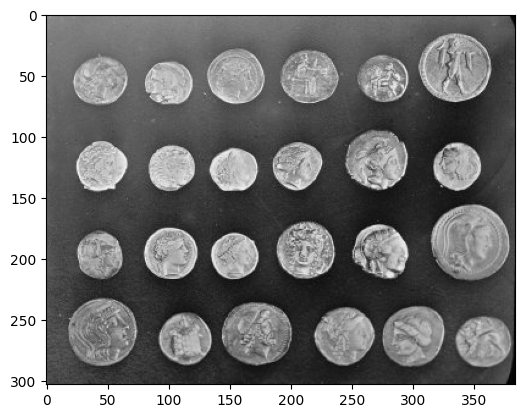

In [6]:
def identity_filter(image):
    return local_operator(
        image,
        kernel_size=(1,1), 
        function=lambda x: x[0][0],
    )
plt.imshow(identity_filter(image), cmap="gray")
plt.show()

### d) Create and apply the following filters:
 - Min Filter (cf. CV-04 slides 23-24)
 - Max Filter (cf. CV-04 slides 23-24)
 - Median Filter (cf. CV-04 slides 25-26)
 - KNN Filter (cf. CV-04 slide 29)
 - SNN Filter (cf. CV-04 slide 30)

Use a kernel_size of `(3, 3)` and for the KNN filter, set K$=4$

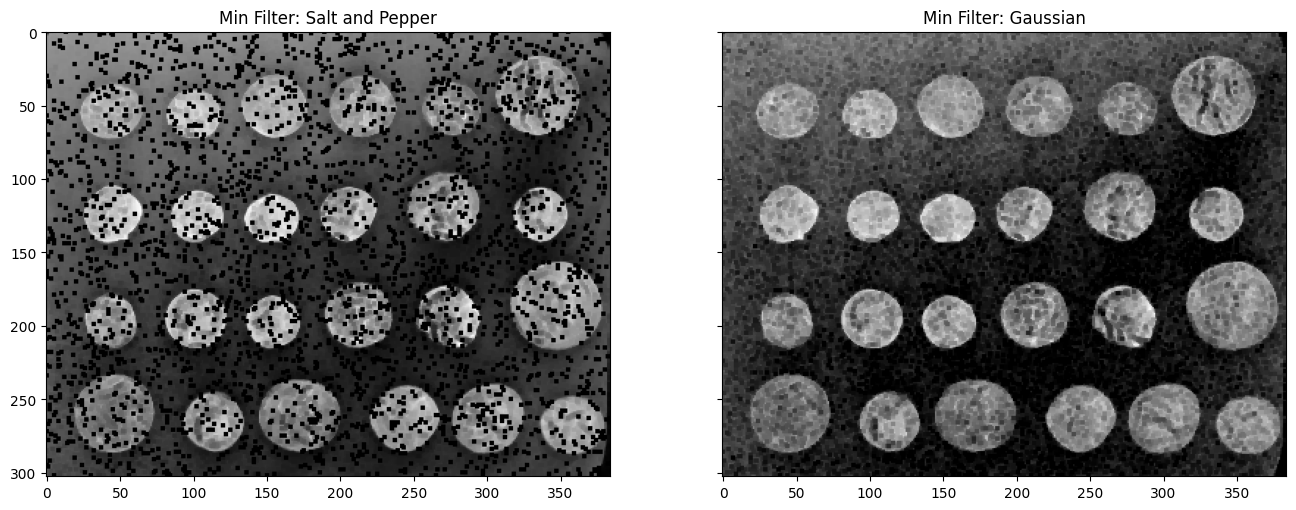

In [7]:
def min_filter(image):
    return local_operator(
        image,
        kernel_size=(3, 3),  
        function=lambda x: np.min(x),  
    )
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(min_filter(sp_noisy), cmap="gray")
ax[0].set_title("Min Filter: Salt and Pepper")

ax[1].imshow(min_filter(gauss_noisy), cmap="gray")
ax[1].set_title("Min Filter: Gaussian")

plt.show()

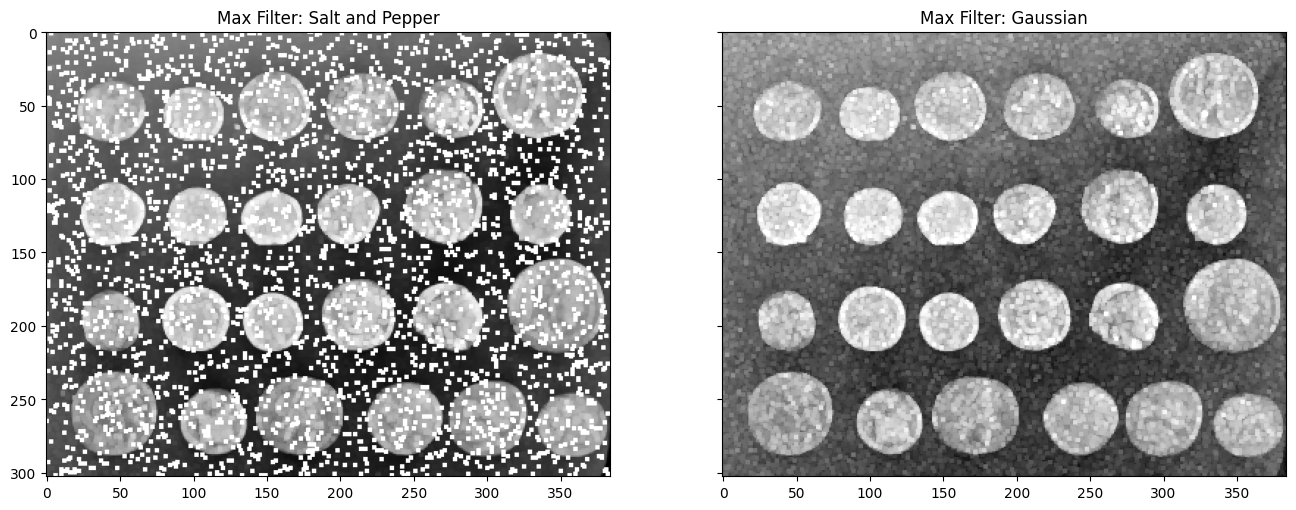

In [8]:
def max_filter(image):
    return local_operator(
        image,
        kernel_size=(3, 3),  
        function=lambda x: np.max(x),  
    )
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(max_filter(sp_noisy), cmap="gray")
ax[0].set_title("Max Filter: Salt and Pepper")

ax[1].imshow(max_filter(gauss_noisy), cmap="gray")
ax[1].set_title("Max Filter: Gaussian")

plt.show()

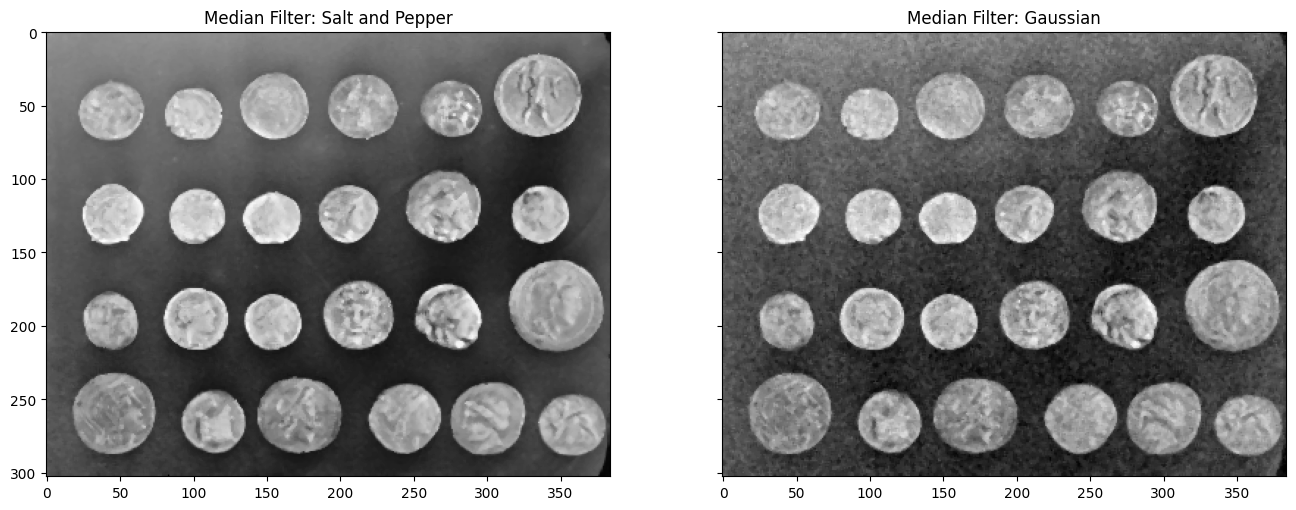

In [9]:
def median_filter(image):
    return local_operator(
        image,
        kernel_size=(3, 3),  
        function=lambda x: np.median(x),  
    )
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(median_filter(sp_noisy), cmap="gray")
ax[0].set_title("Median Filter: Salt and Pepper")

ax[1].imshow(median_filter(gauss_noisy), cmap="gray")
ax[1].set_title("Median Filter: Gaussian")

plt.show()

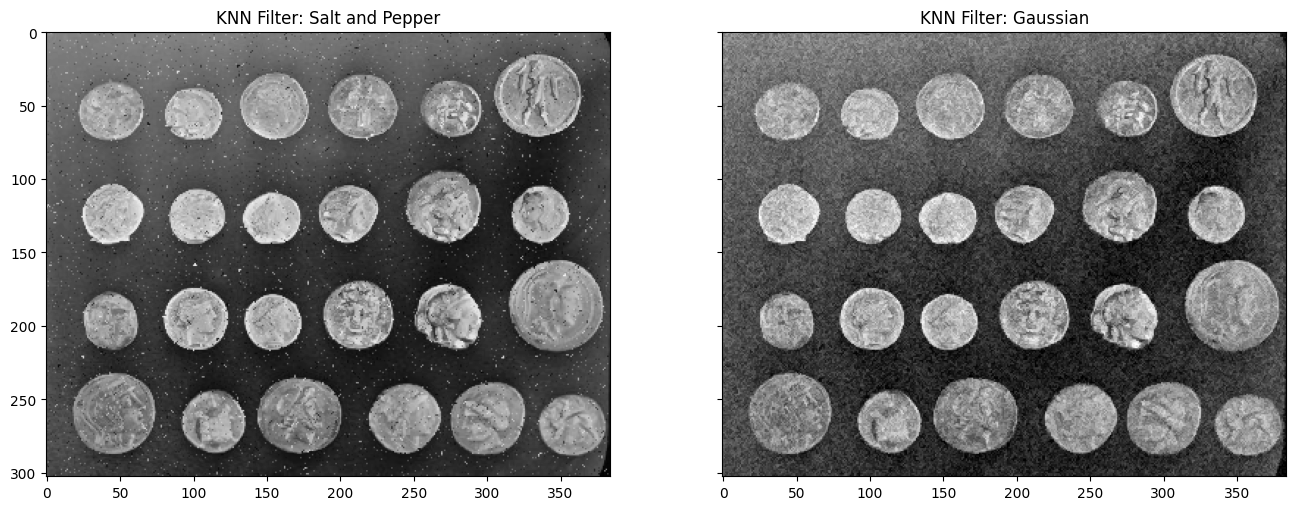

In [22]:
def knn_filter(image, kernel_size=(3, 3), k=4):
    """Apply a k-Nearest-Neighbor filter to the image.

    Args:
        image (np.ndarray): Input image as a 2D array.
        kernel_size (tuple): Size of the kernel window (default is (3, 3)).
        k (int): Number of nearest neighbors to include in the filter.
        
    Returns:
        np.ndarray: Filtered image.
    """
    # Define the kNN function
    def knn_function(window):
        center_value = window[kernel_size[0] // 2, kernel_size[1] // 2]
        # Compute absolute differences with the center pixel
        diffs = np.abs(window - center_value)
        # Sort by differences and select k smallest
        nearest_values = window.flatten()[np.argsort(diffs.flatten())[:k]]
        # Return the mean of the k nearest values
        return np.mean(nearest_values)
    
    return local_operator(image, kernel_size=kernel_size, function=knn_function)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(knn_filter(sp_noisy), cmap="gray")
ax[0].set_title("KNN Filter: Salt and Pepper")

ax[1].imshow(knn_filter(gauss_noisy), cmap="gray")
ax[1].set_title("KNN Filter: Gaussian")

plt.show()

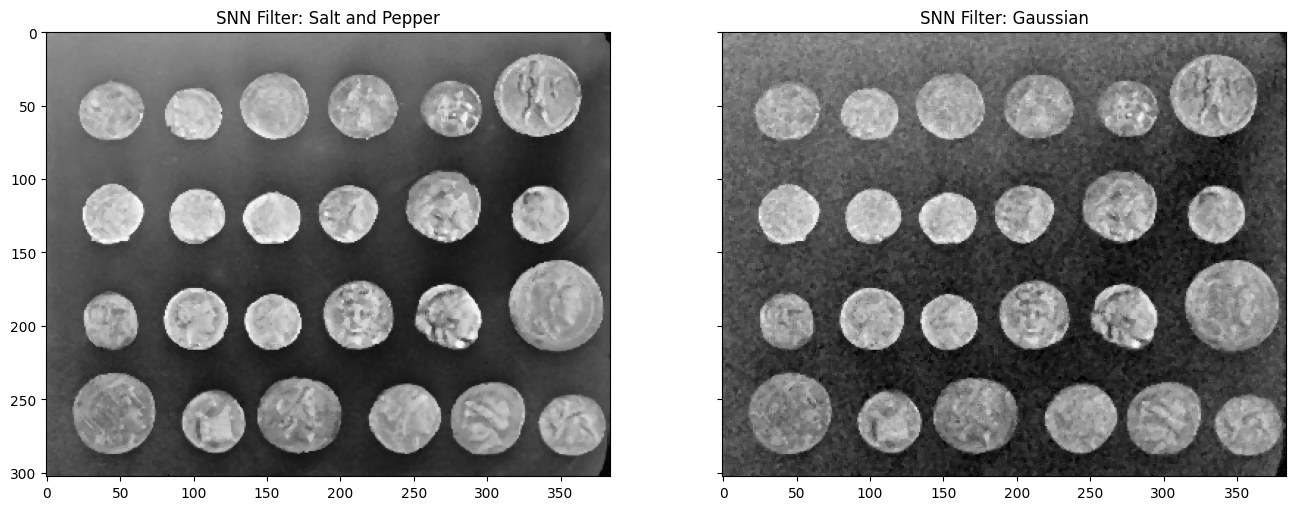

In [23]:
def snn_filter(image, kernel_size=(3, 3), k=4):
    """Apply a Symmetric Nearest Neighbor (SNN) filter to the image.

    Args:
        image (np.ndarray): Input image as a 2D array.
        kernel_size (tuple): Size of the kernel window (default is (3, 3)).
        k (int): Number of symmetric nearest neighbors to include in the filter.
        
    Returns:
        np.ndarray: Filtered image.
    """
    # Define the SNN function
    def snn_function(window):
        # Flatten the window and sort the values
        sorted_values = np.sort(window.flatten())
        # Find the median value in the sorted array
        median_value = np.median(sorted_values)
        # Compute absolute differences with the median
        diffs = np.abs(sorted_values - median_value)
        # Sort by the differences
        sorted_indices = np.argsort(diffs)
        # Select the k nearest neighbors symmetrically
        symmetric_neighbors = sorted_values[sorted_indices[:k]]
        # Return the mean of the symmetric nearest neighbors
        return np.mean(symmetric_neighbors)
    
    return local_operator(image, kernel_size=kernel_size, function=snn_function)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 9))

ax[0].imshow(snn_filter(sp_noisy), cmap="gray")
ax[0].set_title("SNN Filter: Salt and Pepper")

ax[1].imshow(snn_filter(gauss_noisy), cmap="gray")
ax[1].set_title("SNN Filter: Gaussian")

plt.show()

## Assignment 2: Morphological operators (3 points)

This exercise will elaborate on the basic morphological operators of *erosion* and *dilation* (cf. CV-04 slides 35-51).

### a) Morphological operators

Explain in your own words the idea of morphological operators. Describe potential applications.

Morphological operators work with the shape of objects in images, not with pixel intensities. That is why they are typically applied to binary images. They are used to analyze and manipulate the structure of objects, making them easier to recognize. A structuring element, ideally aligned with the shape of the objects of interest, can then perform non-linear filtering as it is shifted across the entire image.

### b) Erosion and dilation

Describe in your own words the morphological operations *erosion* and *dilation*. Compare them with 2D convolution, name commonalities and differences.

#### Eroison
A pixel remains one only if all the pixels under the kernel are also one.

#### Dilation
A pixel becomes one if at least one pixel under the kernel is one.

2D Convolution works with pixel intensities and performs a weighted sum of the neighborhood pixels, where the kernel defines the weights. On the other hand, morphological operators (such as erosion and dilation) typically work with binary images, resulting in binary values (0 or 1), without considering pixel intensities. Both operations, however, rely on a kernel that is applied to the image, and padding is necessary to avoid losing information at the image boundaries. In both cases, the value of the center pixel under the kernel is recalculated, influenced by its neighboring pixels.

Erosion - Sets a pixel to 0 when the entire pattern is matched and makes the image thinner. Dilation - Sets a pixel to 1 when a part of the pattern is matched and makes the image thicker.

Similarity to convulation - the structuring element moves across the image like a filter kernal and updates a single pixel(based on anchor point), the value is based on the neighbors Differences - changes shape of the objects in image vs enhances image features

### c) Structuring element

Erosion of an image $g$ with a structuring element $S$ results in an image $g'$ that is a "subset" of that image (in the sense that all pixels set in $g$ are also set in $g'$) as long as the anchor point is contained in $S$, i.e. covered by a **1** in the structuring element. Provide an example in which the erosion $g'=g\ominus S$ lies outside (or partially outside) of $g$.

If the structuring element $S$ is large compared to the object in the image $g$, the resulting image $g'$ may contain fewer 1s than $g$, potentially causing the output image $g'$ to be smaller or even entirely empty. This happens because the structuring element will not fit entirely inside $g$ at certain positions, especially near the boundaries of the image.

Thus, erosion "shrinks" the image and can result in an image $g'$ that is a "subset" of $g$, with pixels in $g'$ potentially being removed entirely from the original image.

#### Image $g$:

$$
g = \begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{pmatrix}
$$

#### Structuring element $S$:

$$
S = \begin{pmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{pmatrix}
$$

In this case, we apply the erosion operation $g' = g \ominus S$.

The erosion of the image means that we slide the structuring element over the image, and for each position, we check if the structuring element is fully contained within the 1s of the image. If it is, the corresponding pixel in the output image $g'$ is set to 1; otherwise, it is set to 0.

#### Resulting Erosion Image $g'$:

$$
g' = \begin{pmatrix}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0 \\
\end{pmatrix}
$$

- The pixel in position $(2,2)$ remains 1 in the resulting image because the structuring element can fully fit inside the image at that position, covering all 1s in the image
- All other positions become 0 because the structuring element cannot be fully covered by 1s in those areas



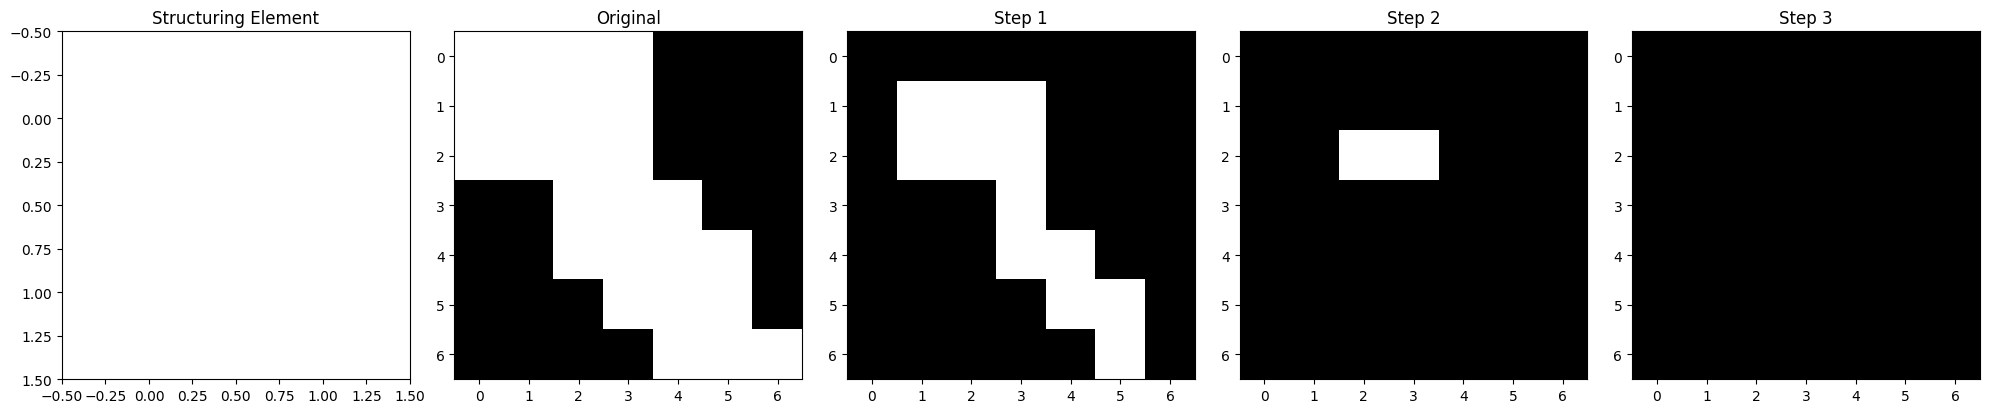

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion

# Binary image (7x7)
g = np.array([
    [1, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 1, 0, 0, 0],
    [1, 1, 1, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0],
    [0, 0, 1, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 1, 1]
])

# 3x3 structuring element (with 1 in the center)
S = np.ones((2, 2))

# Function to perform erosion step by step
def erode_step_by_step(image, struct_elem):
    # Initialize the list to store the results of each erosion step
    steps = [image]  # Add the initial image to the list
    result = image.copy()
    
    # Apply erosion iteratively
    for _ in range(1, 4):  
        # Perform erosion on the current result using the structuring element
        result = binary_erosion(result, structure=struct_elem).astype(int)
        
        steps.append(result)
    
    return steps

# Get the erosion steps (this will return a list of images at each step)
erosion_steps = erode_step_by_step(g, S)

# Create subplots to display the structuring element and the erosion steps
fig, axes = plt.subplots(1, len(erosion_steps) + 1, figsize=(20, 5))

# Plot the structuring element in the first subplot
axes[0].imshow(S, cmap='gray', vmin=0, vmax=1)
axes[0].set_title('Structuring Element')  

# Plot the erosion steps in subsequent subplots
for i, step in enumerate(erosion_steps):
    axes[i + 1].imshow(step, cmap='gray', vmin=0, vmax=1)  
    if i == 0: 
        axes[i + 1].set_title('Original')
        continue
    axes[i + 1].set_title(f'Step {i}')  
 

plt.tight_layout()
plt.show()


## Assignment 3: Properties of morphological operators (5 points)

This exercise will elaborate on the basic morphological operators of *erosion* and *dilation* (cf. CV-04 slides 35-51).

### a) Duality

Proof that *erosion* and *dilation* are *dual* operators, i.e.

$$ g^{\ast}\oplus S = (g\ominus S)^{\ast}\qquad\text{and}\qquad
g^{\ast}\ominus S = (g\oplus S)^{\ast}$$

here $g^{\ast}$ denotes the inverted binary image, i.e. $g^{\ast}(x,y) = 1 - g(x,y) = \neg g(x,y)$, i.e. 1-pixel become 0 and 0-pixel become 1.

Erosion and dilation are **dual** to each other, meaning that erosion of an image $g$ with a structuring element $S$ corresponds to the dilation of the complement of the image, and vice versa. This relationship is expressed mathematically as:

### Mathematical Expressions for Erosion and Dilation:

- **Erosion** of an image $g$ with a structuring element $S$ is defined as:
  
  $$
  g' = g \ominus S
  $$

- **Dilation** of an image $g$ with a structuring element $S$ is defined as:
  
  $$
  g'' = g \oplus S
  $$

The duality is evident in the following identities:

- **Erosion** of an image $g$ with a structuring element $S$ is equivalent to the **dilation** of the complement of $g$ (denoted $\neg g$) with the same structuring element $S$:

  $$
  g' = \neg g \oplus S
  $$

- **Dilation** of an image $g$ with a structuring element $S$ is equivalent to the **erosion** of the complement of $g$ (denoted $\neg g$) with the same structuring element $S$:

  $$
  g'' = \neg g \ominus S
  $$


### The Inverses:

- If we perform erosion on an image $g$ (with $g \ominus S$), we get the eroded image $g'$
- If we take the **complement** of the image $\neg g$ (where all $1$ become $0$ and all $0$ become $1$) and then perform dilation (with $\neg g \oplus S$), we will get the same result as the erosion of $g$


### b) Superposition

As *erosion* and *dilation* have been introduced for binary images, the notion of *linearity* is not really appropriate here. However, some weaker version, called *superposition* can be defined: instead of forming a linear combination, one takes the logical disjunction:

$$(g_1\lor g_2)(x,y) := g_1(x,y)\lor g_2(x,y)$$

Check for both operations if *erosion* and *dilation* are "compatible" with superposition, i.e. if first *eroding* (or *dilating*) two images and superposing the result is the same as first superposing the images and then *eroding* (or *dilating*) the result.

Formally, we want to check if:

$$
(g_1 \ominus S \lor g_2 \ominus S) = (g_1 \lor g_2) \ominus S
$$

for *erosion*, and similarly for *dilation*:

$$
(g_1 \oplus S \lor g_2 \oplus S) = (g_1 \lor g_2) \oplus S
$$

where $\ominus$ and $\oplus$ represent the erosion and dilation operations, respectively, and $S$ is the structuring element used for both operations.

To summarize:
- First, apply erosion (or dilation) to each of the images separately, then combine them using logical OR (superposition).
- Second, combine the images using logical OR, then apply erosion (or dilation) to the result.

We need to check if these two operations yield the same result for both erosion and dilation.



Erosion is NOT compatible with superposition.
Dilation is compatible with superposition.


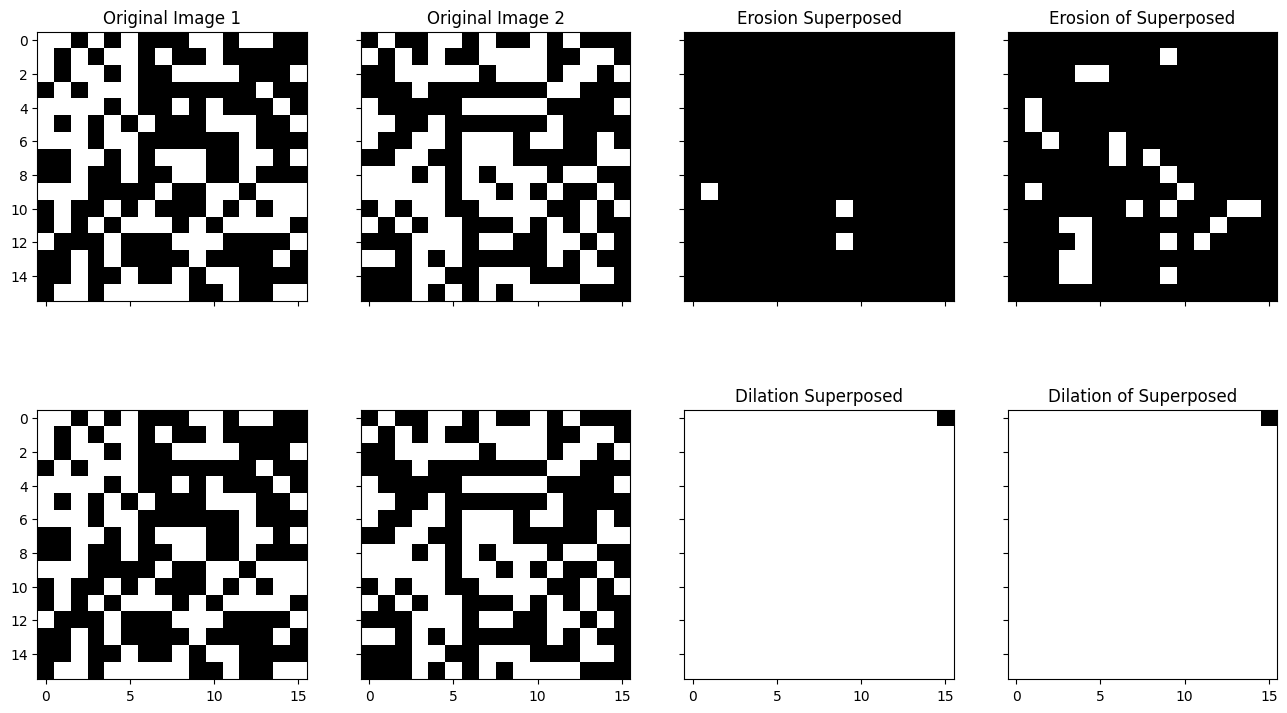

In [13]:
from scipy.ndimage import binary_erosion, binary_dilation

def check_similarity(g1, g2, S, mode):
    # Superposition of g1 and g2
    sp = g1 | g2
    
    # Erosion or Dilation of g1 and g2 based on mode
    if mode == 'Erosion':
        g1_op = binary_erosion(g1, structure=S).astype(int)
        g2_op = binary_erosion(g2, structure=S).astype(int)
    elif mode == 'Dilation':
        g1_op = binary_dilation(g1, structure=S).astype(int)
        g2_op = binary_dilation(g2, structure=S).astype(int)
    else:
        raise ValueError("Mode must be either 'Erosion' or 'Dilation'")
    
    # Superposition of the operated images (erosion or dilation)
    sp_op = g1_op | g2_op
    
    # Erosion or Dilation of the superposition of g1 and g2
    if mode == 'Erosion':
        sp_op_check = binary_erosion(sp, structure=S).astype(int)
    elif mode == 'Dilation':
        sp_op_check = binary_dilation(sp, structure=S).astype(int)
    
    # Check if both results are equal
    res = (sp_op == sp_op_check).all()
    
    if res:
        print(f'{mode} is compatible with superposition.')
    else:
        print(f'{mode} is NOT compatible with superposition.')



# Define the binary images
g1 = np.array([[1, 1, 0, 0, 0],
               [1, 1, 0, 0, 0],
               [0, 0, 1, 1, 0],
               [0, 0, 1, 1, 0],
               [0, 0, 0, 0, 0]])

g2 = np.array([[0, 0, 1, 1, 0],
               [0, 0, 1, 1, 0],
               [0, 1, 1, 1, 0],
               [0, 1, 1, 1, 0],
               [0, 0, 0, 0, 0]])

# Define the structuring element
S = np.ones((3, 3))  # A 3x3 square structuring element


check_similarity(g1, g2, S, 'Erosion')
check_similarity(g1, g2, S, 'Dilation')


# Visualized
from scipy import ndimage
test_image_1 = np.random.randint(2, size=(16,16)).astype(bool)
test_image_2 = np.random.randint(2, size=(16,16)).astype(bool)

e_1 = ndimage.binary_erosion(test_image_1).astype(bool)
e_2 = ndimage.binary_erosion(test_image_2).astype(bool)

# Perform dilation on individual images
d_1 = ndimage.binary_dilation(test_image_1).astype(bool)
d_2 = ndimage.binary_dilation(test_image_2).astype(bool)

# Superpose the eroded and dilated results
erosion_superposed = e_1 | e_2
dilation_superposed = d_1 | d_2

# Superpose the original images
superposed_image = test_image_1 | test_image_2

# Erode and dilate the superposed image
erosion_of_superposed = ndimage.binary_erosion(superposed_image).astype(bool)
dilation_of_superposed = ndimage.binary_dilation(superposed_image).astype(bool)

# Check compatibility
erosion_compatible = np.array_equal(erosion_superposed, erosion_of_superposed)
dilation_compatible = np.array_equal(dilation_superposed, dilation_of_superposed)

# Plot the results
fig, ax = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(16, 9))
ax[0, 0].imshow(test_image_1, cmap="gray")
ax[0, 0].set_title("Original Image 1")
ax[0, 1].imshow(test_image_2, cmap="gray")
ax[0, 1].set_title("Original Image 2")
ax[0, 2].imshow(erosion_superposed, cmap="gray")
ax[0, 2].set_title("Erosion Superposed")
ax[0, 3].imshow(erosion_of_superposed, cmap="gray")
ax[0, 3].set_title("Erosion of Superposed")

ax[1, 0].imshow(test_image_1, cmap="gray")
ax[1, 1].imshow(test_image_2, cmap="gray")
ax[1, 2].imshow(dilation_superposed, cmap="gray")
ax[1, 2].set_title("Dilation Superposed")
ax[1, 3].imshow(dilation_of_superposed, cmap="gray")
ax[1, 3].set_title("Dilation of Superposed")

plt.show()


### c) Chaining

Show that *dilation* and *erosion* have the following properties: given two structering elements $S_1$ and $S_2$, it holds

\begin{align}
  (g\oplus S_1)\oplus S_2 & & = & g\oplus (S_1\oplus S_2) && = (g\oplus S_2)\oplus S_1 \\
  (g\ominus S_1)\ominus S_2 & & = & g\ominus (S_1\ominus S_2) && = (g\ominus S_2)\ominus S_1 \\  
\end{align}

What are the practical consequences?

Remark: for the argument to work, we have to assume, that images and structuring elements are large enough and zero-padded. Otherwise it is possible to create counter examples like the following:

In [14]:
import numpy as np
from scipy.ndimage import binary_dilation
a =          np.array([[0,0,0,0,0],
                      [0,0,0,0,0],
                      [0,0,1,0,0],
                      [0,0,0,0,0],
                      [0,0,0,0,0]])
b2 =          np.array([[0,0,0,0,0], #for this one the rule holds 
                      [0,1,1,1,0],
                      [0,1,1,1,0],
                      [0,1,1,1,0],
                      [0,0,0,0,0]])
b =          np.array([[1,1,1], #for this one it dosen´t
                      [1,1,1],
                      [1,1,1],])
c = b
c2 = b2
d = np.zeros(c.shape, int)
out1 = np.zeros(a.shape, int)
out2 = np.zeros(a.shape, int)
out1 = binary_dilation(binary_dilation(a,b),c)
out2 = binary_dilation(a,binary_dilation(b,c))

print(out1)
print(out2)

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
[[False False False False False]
 [False  True  True  True False]
 [False  True  True  True False]
 [False  True  True  True False]
 [False False False False False]]


### 1. Dilation Property: Chaining

#### Property:
$$
(g \oplus S_1) \oplus S_2 = g \oplus (S_1 \oplus S_2) = (g \oplus S_2) \oplus S_1
$$

#### Explanation:
The dilation operation is **associative**, meaning that the order in which we apply multiple dilation operations does not matter.

- **Left-hand side:**
  $$ (g \oplus S_1) \oplus S_2 $$ means we first dilate the image $g$ by $S_1$, and then dilate the result by $S_2$
  
- **Right-hand side:**
  $$ g \oplus (S_1 \oplus S_2) $$ means we first combine the structuring elements $S_1$ and $S_2$ (by dilating them together), and then dilate the image $g$ by this combined structuring element.
  
- The associativity of dilation ensures that these two operations yield the same result. Additionally, dilation is commutative, so we can also swap $S_1$ and $S_2$, which gives the third form: $$ (g \oplus S_2) \oplus S_1 $$

This property tells us that the order in which we apply dilation with different structuring elements doesn't change the outcome.

### 2. Erosion Property: Chaining

#### Property:
$$
(g \ominus S_1) \ominus S_2 = g \ominus (S_1 \ominus S_2) = (g \ominus S_2) \ominus S_1
$$

#### Explanation:
The erosion operation is **also associative**, meaning that the order in which we apply multiple erosion operations does not matter either.

- **Left-hand side:**
  $$ (g \ominus S_1) \ominus S_2 $$ means we first erode the image $g$ by $S_1$, and then erode the result by $S_2$.
  
- **Right-hand side:**
  $$ g \ominus (S_1 \ominus S_2) $$ means we first combine the structuring elements $S_1$ and $S_2$ (by eroding them together), and then erode the image $g$ by this combined structuring element.
  
- Again, the associativity of erosion ensures that these two operations yield the same result. And, like dilation, erosion is commutative, so we can swap $S_1$ and $S_2$, which gives the third form: $$ (g \ominus S_2) \ominus S_1 $$

This property tells us that the order in which we apply erosion with different structuring elements doesn't change the outcome.

### Practical Consequences

- **Simplifies computation**: Since dilation and erosion are associative and commutative, we can rearrange the order of operations or group the structuring elements in different ways without affecting the final result. This can simplify algorithmic implementation and optimization
  
- **Flexible structuring element application**: We can combine multiple structuring elements into a single operation, or apply them in any order, and the result will remain the same. This allows for more flexible and efficient design of morphological algorithms
  
- **Parallelism in image processing**: Since the order of operations doesn't matter, it opens up the possibility of parallel processing in certain cases, where different structuring elements can be applied to different regions of the image independently



## Assignment 4: Custom Structuring Element (5 points)

Landsat 7 was a satelite mission for acquisition of satellite imagery of Earth. Unfortunately the Scan Line Corrector failed, resulting in black stripes on the aquired images. More information: [https://landsat.gsfc.nasa.gov/satellites/landsat-7](https://landsat.gsfc.nasa.gov/satellites/landsat-7)

### a) A first fix

A rather crude fix is to apply a custom structuring element for dilation and erosion (see CV-04, 66ff). Complement the code below (in part (b)) in the following way:
* Rotate the image such that the gaps are horizontal.
* Dilate the rotated image with a vertical structuring element. I.e. take the maximum of an area of size $7 \times1$ and assign it to the center pixel. Repeat for all pixels.
* Erode the dilated image.
* Rotate the result back.

Remark: this exercise applies morphological operator to color images. This extends the idea of generalizing morphological operators to gray value images.  

### b) Improving the solution
You may get better results by thresholding and applying the morphological operations only to pixels below a threshold, i.e. gap pixels. Compliment your solution from a). 

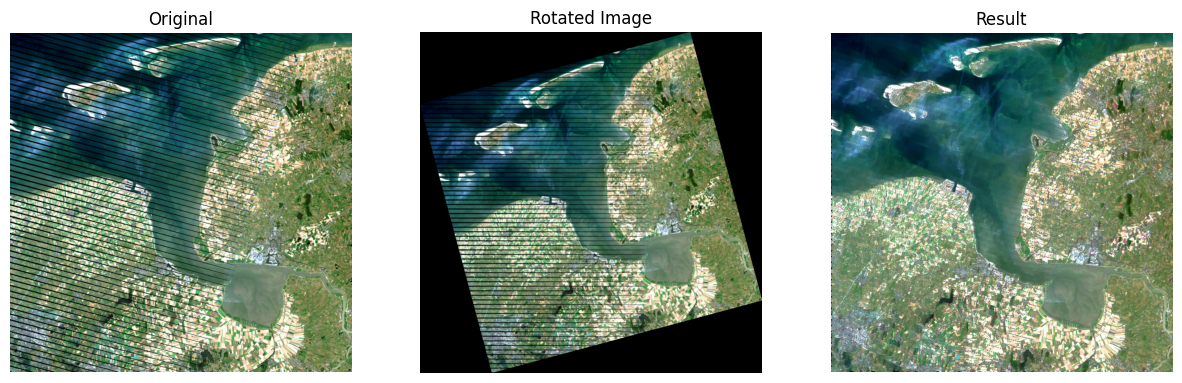

In [15]:
import numpy as np
from scipy.ndimage import grey_dilation, grey_erosion
import matplotlib.pyplot as plt
from skimage.transform import rotate
from imageio.v3 import imread

angle = 15  # Angle for rotation
thresh = 0.3  # Threshold for identifying stripes
struc_elem = np.ones((7, 1), dtype=bool)  # Structuring element for dilation/erosion

# Read the image
img = imread("images/images/landsat_stack2.png")

# Reorder to true RGB, which is originally arranged inversely in Landsat 7
img = np.stack([img[..., 2], img[..., 1], img[..., 0]], axis=-1)

# Normalize the image (scaling pixel values between 0 and 1)
img = (img - np.min(img)) / np.ptp(img)

# Create a binary mask where the pixel values are below the threshold (identifying the stripes)
thresh_img = np.where(img < thresh, 1, 0)  # 1 for stripes, 0 for non-stripes

# Rotate the image by the specified angle
rotated_img = np.clip(rotate(img, angle, resize=True), 0, 1)

# Apply dilation and erosion to the rotated image only for the identified stripes
dilated_img = np.stack([grey_dilation(rotated_img[..., channel], size=(7, 1)) 
                        for channel in range(rotated_img.shape[-1])], axis=-1)

eroded_img = np.stack([grey_erosion(dilated_img[..., channel], size=(7, 1)) 
                       for channel in range(dilated_img.shape[-1])], axis=-1)

# Rotate the processed image back to the original orientation
final_img = np.clip(rotate(eroded_img, -angle, resize=True), 0, 1)

# Crop the processed image to the original size of the image
final_img = final_img[
    (final_img.shape[0] - img.shape[0]) // 2 : (final_img.shape[0] + img.shape[0]) // 2,
    (final_img.shape[1] - img.shape[1]) // 2 : (final_img.shape[1] + img.shape[1]) // 2,
    :
]

# Combine the processed (stripes) and original (non-stripes) parts of the image
result = img * (1 - thresh_img) + final_img * thresh_img


plt.figure(figsize=(15, 20))
plt.subplot(1, 3, 1); plt.imshow(img); plt.axis('off'); plt.title("Original")
plt.subplot(1, 3, 2); plt.imshow(rotated_img); plt.axis('off'); plt.title("Rotated Image")
plt.subplot(1, 3, 3); plt.imshow(result); plt.axis('off'); plt.title("Result")
plt.show()


### c) Bonus
Can you think of (and implement) other ways to add the missing data? 


One could use the Fourier Transform to identify the stripe frequencies in the frequency domain and filter them out. If the stripes appear as low-frequency components, we can apply a high-pass filter to remove them. However, if the stripes are very fine, they might correspond to high frequencies, in which case a low-pass filter would be more appropriate.

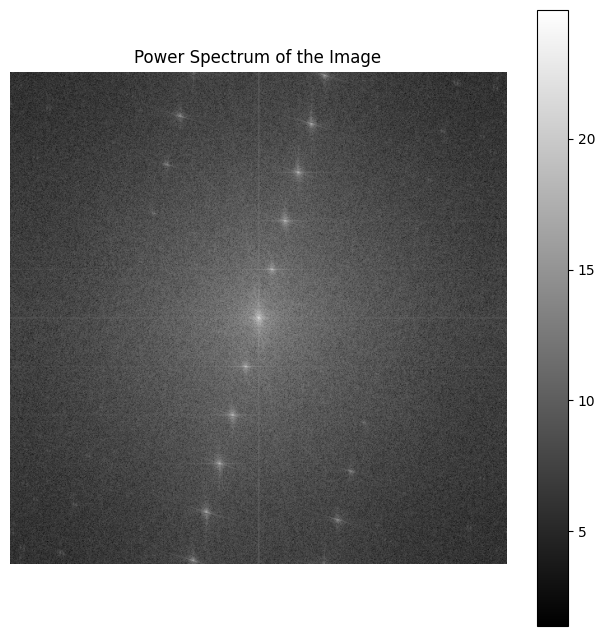

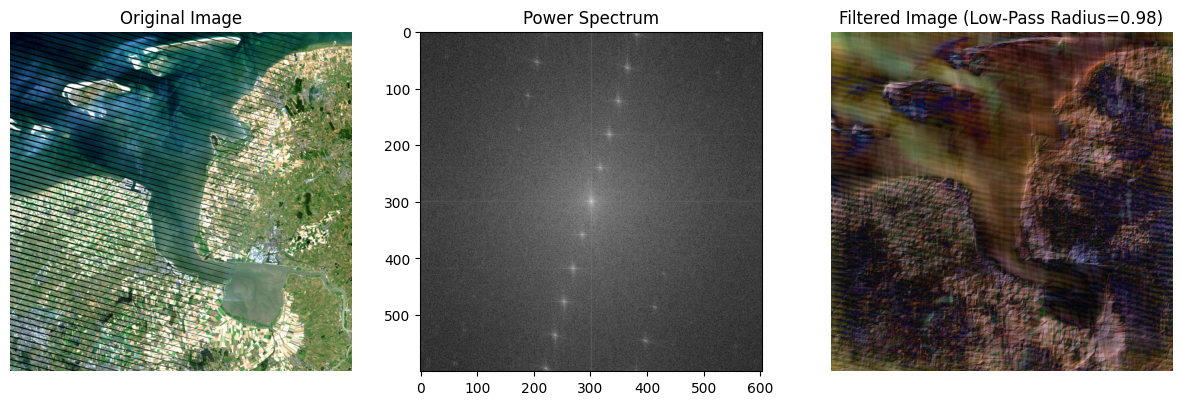

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from imageio.v3 import imread


img = imread("images/images/landsat_stack2.png")
# Reorder to true RGB, which is originally arranged inversely in Landsat 7
img = np.stack([img[..., 2], img[..., 1], img[..., 0]], axis=-1)
img = (img - np.min(img)) / np.ptp(img)  

# Compute the 2D FFT of the image
img_fft = fft2(img, axes=(0, 1))  # FFT only on the spatial dimensions (height and width)
img_fft_shifted = fftshift(img_fft)  # Shift zero-frequency component to the center

# Compute the power spectrum (magnitude of the FFT)
power_spectrum = np.abs(img_fft_shifted)**2

# Display the power spectrum (log scale for better visibility)
plt.figure(figsize=(8, 8))
plt.imshow(np.log(power_spectrum.sum(axis=-1) + 1), cmap='gray')  # Sum over all channels for RGB
plt.colorbar()
plt.title("Power Spectrum of the Image")
plt.axis('off')
plt.show()


rows, cols = img.shape[:2]
crow, ccol = rows // 2, cols // 2  # Center of the image

# Set a high threshold for the  filter (adjust this value based on the Power Spectrum)
radius = .98 

# Create a mask
mask = np.ones((rows, cols))  # Initialize mask to all ones
Y, X = np.fft.fftfreq(rows), np.fft.fftfreq(cols)
X, Y = np.meshgrid(X, Y)
distance = np.sqrt((X - X[crow, ccol])**2 + (Y - Y[crow, ccol])**2)

# Set values outside the threshold radius to 0, to block lower frequencies
mask[distance <= radius] = 0  # Zero-out the low frequencies

# Apply the mask to the frequency domain (filter the frequencies)
img_fft_shifted_filtered = img_fft_shifted * mask[..., None]  # Apply the mask to all channels

# Perform the inverse FFT to reconstruct the image
img_filtered = np.abs(ifft2(ifftshift(img_fft_shifted_filtered), axes=(0, 1)))

# Normalize the result image to the range [0, 1] for visualization
result_normalized = np.clip((img_filtered - np.min(img_filtered)) / np.ptp(img_filtered), 0, 1)

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.log(power_spectrum.sum(axis=-1) + 1), cmap='gray')
plt.title("Power Spectrum")

plt.subplot(1, 3, 3)
plt.imshow(result_normalized)
plt.title(f"Filtered Image (Low-Pass Radius={radius})")
plt.axis('off')
plt.show()

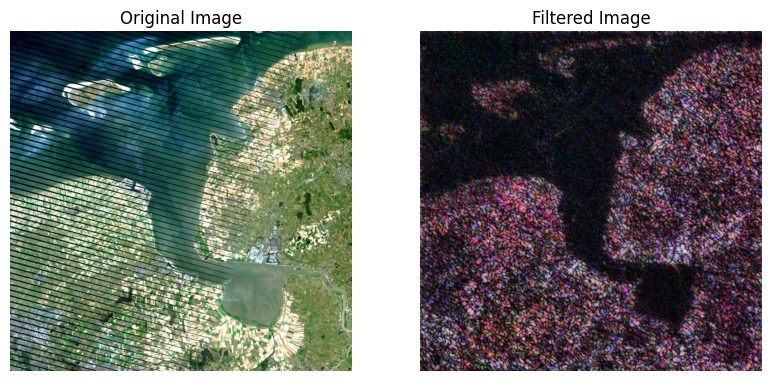

In [18]:
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftshift, ifftshift
from imageio.v3 import imread


# Here we apply Fourier Transform to each channel separately
# Load the image
img = imread("images/images/landsat_stack2.png")
# Reorder to true RGB, which is originally arranged inversely in Landsat 7
img = np.stack([img[..., 2], img[..., 1], img[..., 0]], axis=-1)
# Normalize the image to the range [0, 1]
img = (img - np.min(img)) / np.ptp(img)  

# Convert the image to float64 data type for better precision during processing
img_rgb = np.asarray(img, dtype=np.float64)

# Split the image into RGB channels
img_r, img_g, img_b = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]

rows, cols = img.shape[:2]
crow, ccol = rows // 2, cols // 2  # Center of the image

# Compute the frequency distance matrix (for creating a filter mask)
Y, X = np.fft.fftfreq(rows), np.fft.fftfreq(cols)
X, Y = np.meshgrid(X, Y)

# Calculate the distance of each point from the center (useful for filtering)
distance = np.sqrt((X - X[crow, ccol])**2 + (Y - Y[crow, ccol])**2)

# Define the radius (controls the cutoff for frequencies)
radius = .3  

# Create the filter mask
mask = np.ones((rows, cols))  
mask[distance > radius] = 0  

# Apply Fourier Transform to the RGB channels
img_r_fft = fft2(img_r)
img_g_fft = fft2(img_g)
img_b_fft = fft2(img_b)

# Apply the filter mask to each channel in the frequency domain
img_r_fft_filtered = img_r_fft * mask
img_g_fft_filtered = img_g_fft * mask
img_b_fft_filtered = img_b_fft * mask

# Apply the inverse Fourier Transform to return to the spatial domain
img_r_filtered = np.abs(ifft2(img_r_fft_filtered))
img_g_filtered = np.abs(ifft2(img_g_fft_filtered))
img_b_filtered = np.abs(ifft2(img_b_fft_filtered))

# Combine the filtered RGB channels back into a single image
img_filtered_rgb = np.stack([img_r_filtered, img_g_filtered, img_b_filtered], axis=-1)

# Normalize the image to the range [0, 1] for visualization
result_normalized = np.clip((img_filtered_rgb - np.min(img_filtered_rgb)) / np.ptp(img_filtered_rgb), 0, 1)

# Apply adaptive histogram equalization for better contrast
result_normalized = exposure.equalize_adapthist(result_normalized, clip_limit=0.01)

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(result_normalized)
plt.title("Filtered Image")
plt.axis('off')
plt.show()